In [1]:
import os
import math
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from utils.draw import draw_single

In [2]:
def generate(count):
    X = np.random.randint(0, high=255, size=(count, 9))
    Y = X.dot(np.array([1, 1, 1, 0, 0, 0, -1, -1, -1]))
    Y[Y > 0] = 1
    Y[Y < 0] = -1
    return X, Y

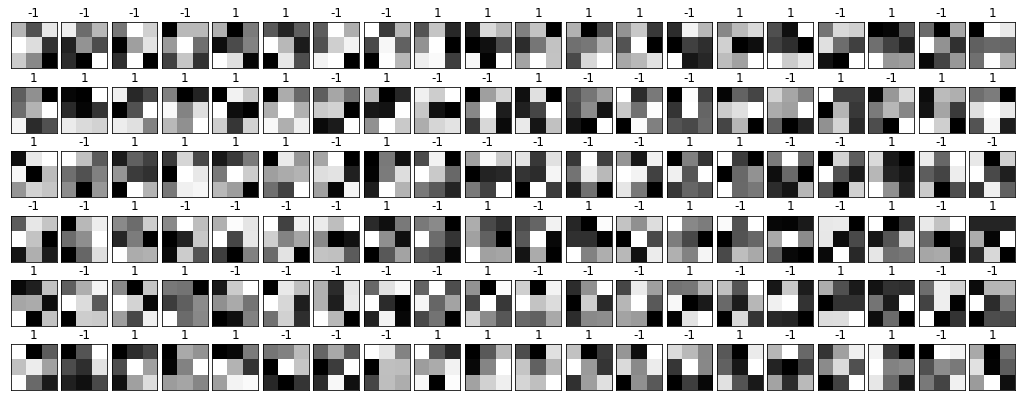

In [3]:
draw_single(*generate(120))

In [10]:
def train(n=512, epochs=31000, lr = 1e-3):
    # weight vector
    W = np.random.randn(9, 1)

    # training loop
    for t in range(epochs):
        # get new training data
        X, y = generate(n)
        X = X / 255
        y = y.reshape(n, 1)

        # model function
        h = X.dot(W)

        # compute loss
        loss = np.square(h - y).mean()

        # compute accuracy
        acc = (np.sign(h) == y).mean()

        if t % 5000 == 0:
            print('l: {:>8f}, a {:>.4f} (e {})'.format(loss, acc, t))

        # grad + update
        grad_w = 2 * X.T.dot(h - y) / n
        W -= lr * grad_w

    return W

In [13]:
W = train()
print('\nFinal W = \n\n{}'.format(W))

l: 13.742377, a 0.4863 (e 0)
l: 0.857331, a 0.6348 (e 5000)
l: 0.442385, a 0.9180 (e 10000)
l: 0.389884, a 0.9531 (e 15000)
l: 0.333467, a 0.9941 (e 20000)
l: 0.352668, a 0.9902 (e 25000)
l: 0.378505, a 0.9961 (e 30000)

Final W = 

[[ 1.11872968]
 [ 1.13346499]
 [ 1.12741776]
 [-0.00761699]
 [-0.00730407]
 [ 0.00328287]
 [-1.12604869]
 [-1.12615404]
 [-1.12426833]]
